In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
from IPython.display import display
import mglearn

print(f'Python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {matplotlib.__version__}')
print(f'NumPy version: {np.__version__}')
print(f'SciPy version: {sp.__version__}')
print(f'IPython version: {IPython.__version__}')
print(f'scikit-learn version: {sklearn.__version__}')

/Users/matthewmckenna/miniconda3/envs/intro-to-ml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


Python version: 3.7.0 (default, Jun 28 2018, 07:39:16) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.23.4
matplotlib version: 2.2.3
NumPy version: 1.15.1
SciPy version: 1.1.0
IPython version: 6.4.0
scikit-learn version: 0.19.1


### Some Sample Datasets

X.shape: (26, 2)


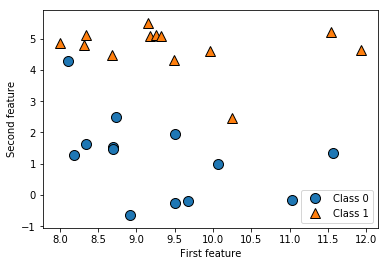

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print(f'X.shape: {X.shape}')

Text(0,0.5,'Target')

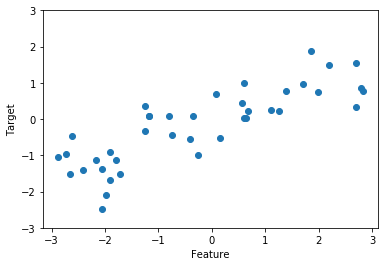

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

#### Wisconsin Breast Cancer Dataset

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f'cancer.keys(): \n{cancer.keys()}')

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print(f'Shape of cancer dataset: {cancer.data.shape}')

Shape of cancer dataset: (569, 30)


There are `569` data points with `30` features each.

We will now look to see how many data points belong to each class:

In [6]:
print(f'Sample counts per class:\n{ {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))} }')

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print(f'Feature names:\n{cancer.feature_names}')

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Boston Housing Dataset

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f'Data shape: {boston.data.shape}')

Data shape: (506, 13)


We'll also look at the *interactions* between features in this dataset, so instead of `13` features, we will look at `91` combinations of two features within the original `13` (`13` choose `2`)

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print(f'X shape: {X.shape}')

X shape: (506, 104)


### k-Nearest Neighbours

Arguably one of the simplest machine learning algorithms. Building the model consists of storing the training dataset. To make a prediction, the algorithm finds the closest point in the training dataset - it's "nearest neighbours".

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

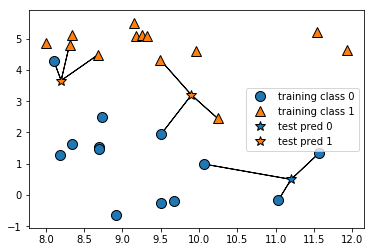

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print(f'Test set predictions: {clf.predict(X_test)}')

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print(f'Test set accuracy: {clf.score(X_test, y_test):.2f}')

Test set accuracy: 0.86


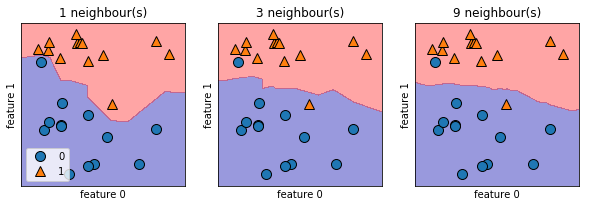

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbours, ax in zip([1, 3, 9], axes):
    # note the spelling of the local variable `n_neighbours`!
    clf = KNeighborsClassifier(n_neighbors=n_neighbours).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbours} neighbour(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

axes[0].legend(loc=3)

Using only a few neighbours corresponds to high model complexity, and using many neigbours corresponds to low model complexity.

#### Aside to look "under-the-hood" at `mglearn.plots.plot_2d_separator`

In [18]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
print(x_min, x_max)
print(y_min, y_max)
# get the range of x and y values (1000 values each)
xx = np.linspace(x_min, x_max, 1000)
yy = np.linspace(y_min, y_max, 1000)
print(xx.shape)
print(yy.shape)

7.498152872102121 12.430271360747538
-1.139932251597677 5.998322463299331
(1000,)
(1000,)


In [19]:
# https://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python-numpy
# say we want a rectangular grid with a point at each integer value
# between 0 and 4 --> 25 points.
# manual array creation:
# x[0,0] = 0    y[0,0] = 0
# x[0,1] = 1    y[0,1] = 0
# x[0,2] = 2    y[0,2] = 0
# x[0,3] = 3    y[0,3] = 0
# x[0,4] = 4    y[0,4] = 0
# x[1,0] = 0    y[1,0] = 1
# ...
# which gives:
# x =   0 1 2 3 4        y =   0 0 0 0 0
#       0 1 2 3 4              1 1 1 1 1
#       0 1 2 3 4              2 2 2 2 2
#       0 1 2 3 4              3 3 3 3 3
#       0 1 2 3 4              4 4 4 4 4
# or more simply:
# xvalues = np.array([0, 1, 2, 3, 4]);
# yvalues = np.array([0, 1, 2, 3, 4]);
# xx, yy = np.meshgrid(xvalues, yvalues)
X1, X2 = np.meshgrid(xx, yy)
print(X1.shape, X2.shape)
print(X1[:2, :2])
print()
print(X2[:2, :2])

(1000, 1000) (1000, 1000)
[[7.49815287 7.50308993]
 [7.49815287 7.50308993]]

[[-1.13993225 -1.13993225]
 [-1.13278685 -1.13278685]]


In [20]:
# `.ravel()` flattens the array
# `.c_` does a pairwise "listing" in this case
# it is passed two lists (ndarrays) and takes one element from `X1`
# and one from `X2` as follows:
# [[X1[0], X2[0],
#  [X1[1], X2[1],
#  ...,
#  [X1[-1], X2[-1]]
X_grid = np.c_[X1.ravel(), X2.ravel()]

decision_values.shape: (1000000,)
fill_levels: [0, 0.5, 1]


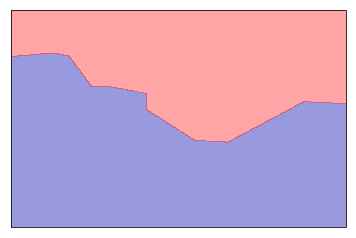

In [21]:
from matplotlib.colors import ListedColormap
cm2 = ListedColormap(['#0000aa', '#ff2020'])
_ = KNeighborsClassifier(n_neighbors=1).fit(X, y)
# gets the probability that the data point belongs to class 1
decision_values = _.predict_proba(X_grid)[:, 1]
print(f'decision_values.shape: {decision_values.shape}')
levels = [.5]
fill_levels = [0] + levels + [1]
print(f'fill_levels: {fill_levels}')
ax = plt.gca()
# we need to reshape `decision_values` from a 1 million element flat array
# to a 1000 x 1000 2d array
ax.contourf(X1, X2, decision_values.reshape(X1.shape), levels=fill_levels, alpha=0.4, cmap=cm2);
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(());

In [22]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=66,
)

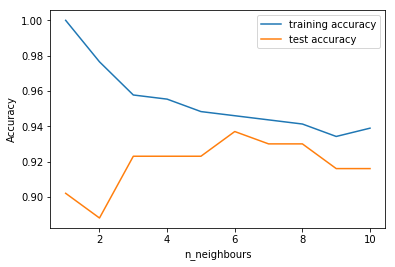

In [23]:
training_accuracy = []
test_accuracy = []

# look at neighbours from 1 to 10
neighbours_settings = range(1, 11)

for n_neighbours in neighbours_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbours)
    clf.fit(X_train, y_train)
    # record the training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record the generalisation accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbours_settings, training_accuracy, label='training accuracy')
plt.plot(neighbours_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbours')
plt.legend()

### k-neighbours regression

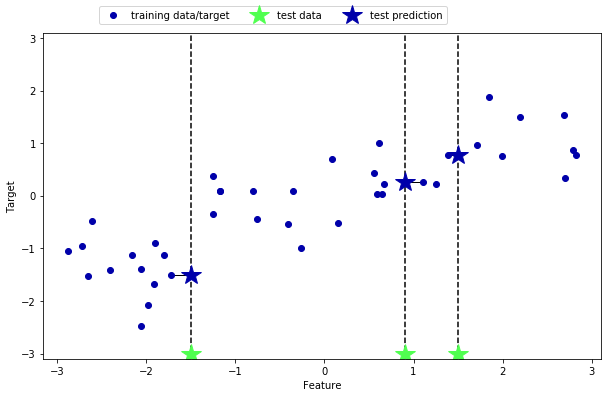

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

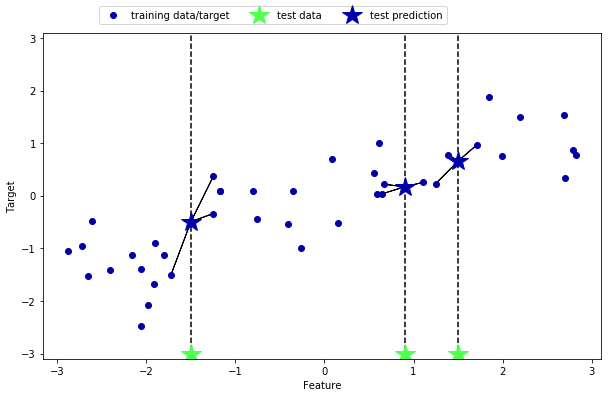

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbours to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

print(f'Test set predictions:\n{reg.predict(X_test)}')

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [27]:
print(f'Test set R^2: {reg.score(X_test, y_test):.2f}')

Test set R^2: 0.83


In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1000 data points evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbours, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbours
    reg = KNeighborsRegressor(n_neighbors=n_neighbours)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        f'{n_neighbours} neighbour(s)\n train score: {reg.score(X_train, y_train):.2f} '
        f'test score: {reg.score(X_test, y_test):.2f}'
    )
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc='best')

### Strengths, Weaknesses and Parameters

# Parameters:

* `n_neighbors`
* distance metric used (default: Euclidean)

Strengths:

* easy to understand
* reasonable performance without a lot of adjustments
* building model fast

Weaknesses:

* can be slow to predict with large datasets
* doesn't do well with hundreds+ of features
* poor with *sparse datasets*